In [1]:
import numpy as np

In [2]:
import os

In [4]:
import matplotlib.pyplot as plt

In [191]:
from PIL import Image

In [203]:
curr_folder = os.getcwd()
save_file = os.path.join(curr_folder,'train_with_cu/396_21.npy')
img_2 = np.load(save_file)

In [204]:
img_2.shape

(2, 256, 256)

In [305]:
curr_folder = os.getcwd()
save_file = os.path.join(curr_folder,'graph_396_21.npy')
img = np.load(save_file)

In [132]:
cmap = 'Greys'

In [183]:
test_img = np.zeros((256,256))
for i in range(256):
    for j in range(256):
        if (skeleton[i][j] == 0):
            test_img[i][j] = img_2[0][i,j]
        else:
            test_img[i,j] = 1

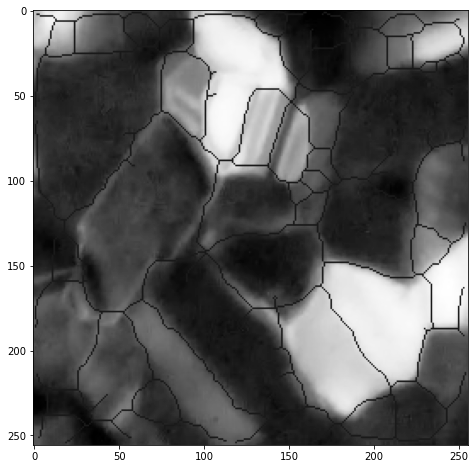

In [184]:
plt.figure(figsize = (8,8))
plt.imshow(test_img,cmap = cmap)

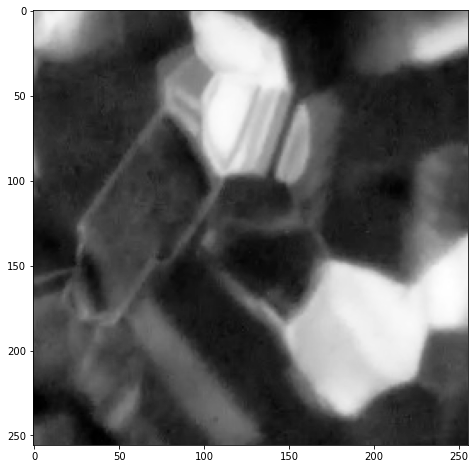

In [164]:
plt.figure(figsize = (8,8))
plt.imshow(img_2[1],cmap = cmap)
plt.imshow(img_2[0],cmap = cmap)

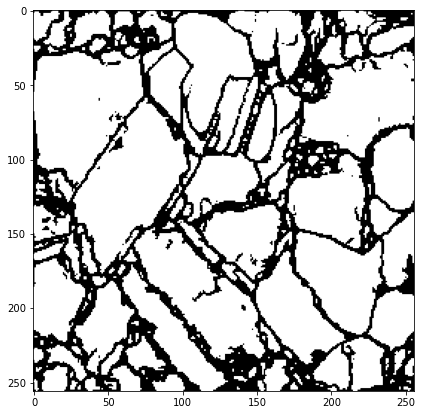

In [161]:
plt.figure(figsize = (7,7))
plt.imshow(img,cmap = cmap)

In [306]:
#adding boundary so that i can complete the incomplete boundaries present outside
img_size = img.shape
img[0,:] = np.ones((img_size[1]))
img[img_size[0]-1,:] = np.ones((img_size[1]))
img[:,0] = np.ones((img_size[0]))
img[:,img_size[1]-1] = np.ones((img_size[0]))

In [307]:
img = img.astype(np.uint8)

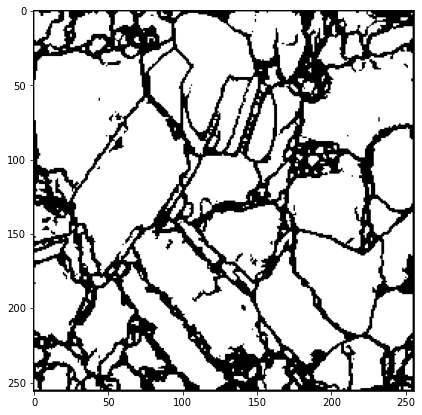

In [309]:
plt.figure(figsize = (7,7))
plt.imshow(img,cmap = cmap)

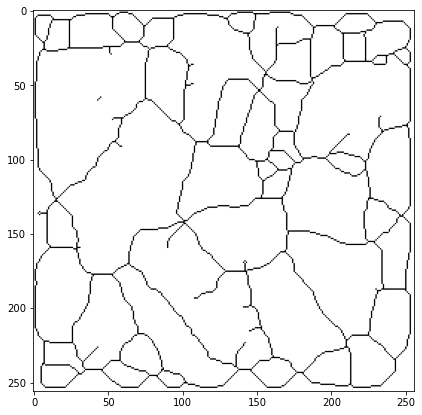

In [322]:
#add dilation 

plt.figure(figsize =(7,7))

kernel_dil = np.ones((3,3),np.uint8)
dilation = cv.dilate(img,kernel_dil,iterations=3)
skeleton = skeletonize(dilation)
#erosion = cv.erode(dilation,kernel_dil,iterations = 1)
plt.imshow(skeleton,cmap = cmap)

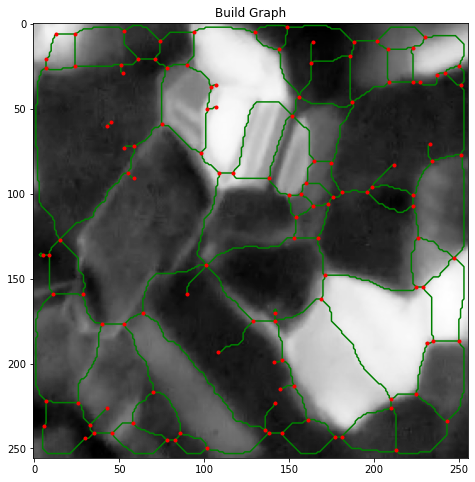

In [667]:
fig = plt.figure(figsize = (8,8))
graph = sknw.build_sknw(skeleton_int)
plt.imshow(img_2[0],cmap = cmap)
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green')
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
plt.plot(ps[:,1], ps[:,0], 'r.')
plt.title('Build Graph')
plt.show()

In [360]:
cycles[0]

[4, 12, 0]

In [361]:
skeleton_int.shape

(256, 256)

In [363]:
width, height = skeleton_int.shape
colored_image = np.zeros((height,width,3),dtype = np.uint8)
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]

In [365]:
graph.edges[(0,4)]['pts']

array([[  2, 149],
       [  1, 147],
       [  1, 146],
       [  1, 145],
       [  1, 144],
       [  1, 143],
       [  1, 142],
       [  1, 141],
       [  1, 140],
       [  1, 139],
       [  1, 138],
       [  1, 137],
       [  2, 136],
       [  2, 135],
       [  2, 134],
       [  2, 133],
       [  3, 132],
       [  4, 131],
       [  5, 130]], dtype=int16)

In [367]:
gg = cycles[0]

In [371]:
range(-1,len(gg)-1)

range(-1, 2)

In [376]:
gg_pts = [(gg[i-1],gg[i]) for i in range(len(gg))]

In [403]:
gg_pts

[(0, 4), (4, 12), (12, 0)]

In [440]:
gg

[4, 12, 0]

In [441]:

gg_Arr = [graph.nodes[i]['o'] for i in gg]

In [443]:
gg_Arr = np.array(gg_Arr)

In [444]:
gg_Arr

array([[  5, 130],
       [ 15, 144],
       [  2, 149]], dtype=uint16)

In [453]:
gg_Arr_mean = np.mean(gg_Arr,axis = 0,dtype = np.uint16)

In [454]:
gg_Arr_mean

array([  7, 141], dtype=uint16)

In [464]:
def fill_area_with_color(image, boundary_pixels, centroid, fill_color):
    # Create a mask with the same shape as the image
    mask = np.zeros_like(image, dtype=np.uint16)

    # Convert the boundary pixels and centroid to numpy arrays
    #boundary_pixels = np.array(boundary_pixels)
    #centroid = np.array(centroid)
    
    boundary_pixels = np.array(boundary_pixels,dtype = np.uint16).reshape((-1,1,2))


    # Fill the region inside the contour with the specified color
    cv.drawContours(mask, [boundary_pixels], 0,255,-1)

    # Create a mask for the centroid
    cv.circle(mask, centorid, 1, 255, -1)
    
    color_mask = np.zeros_like(image)
    color_mask[:,:] = fill_color

    # Combine the contour mask and centroid mask
    masked_color = cv.bitwise_and(color_mask,color_mask,mask = mask)
    
    # Apply the mask to the image to fill the area with color
    filled_image = cv.bitwise_or(image, masked_color)

    return filled_image

In [463]:
color

(65, 181, 27)

In [465]:
gg_img = fill_area_with_color(colored_image_2,appended_array,gg_Arr_mean,color)

error: OpenCV(4.5.3) /tmp/pip-req-build-afu9cjzs/opencv/modules/imgproc/src/drawing.cpp:2501: error: (-215:Assertion failed) npoints > 0 in function 'drawContours'


In [421]:
graph.edges[gg_pt]['pts']

array([[  5, 130],
       [  7, 131],
       [  8, 131],
       [  9, 131],
       [ 10, 132],
       [ 11, 133],
       [ 12, 134],
       [ 13, 135],
       [ 13, 136],
       [ 13, 137],
       [ 14, 138],
       [ 14, 139],
       [ 14, 140],
       [ 15, 141],
       [ 15, 142],
       [ 15, 144]], dtype=int16)

In [417]:
arr.append([1,2,3])

In [418]:
arr

[[1, 2, 3]]

In [395]:
colored_image = np.ones((height, width, 3), dtype=np.uint8)

In [389]:
def generate_rgb_colors(num_colors):
    
    color_func = lambda x: ((x * 137) % 256, (x * 157) % 256, (x * 179) % 256)

    rgb_colors = [color_func(i * 255 // num_colors) for i in range(num_colors)]

    return rgb_colors

In [390]:
colors = generate_rgb_colors(len(cycles))

In [496]:
def fill_cycle_with_color(image,cycle_pixels,color):
    
    mask = np.zeros_like(image,dtype=np.uint16)
    
    contour = cycle_pixels.reshape((-1,1,2))
    
    cv.fillPoly(mask,[contour],color,lineType = cv.LINE_AA)
    
    filled_image = cv.bitwise_or(image,mask)
    
    return filled_image

In [498]:
colored_image_2 = np.ones((height, width, 3), dtype=np.uint16)
fill_cycle_with_color(colored_image_2,appended_array,color)

error: OpenCV(4.5.3) /tmp/pip-req-build-afu9cjzs/opencv/modules/imgproc/src/drawing.cpp:2395: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'fillPoly'


In [ ]:
colored_image_2 = np.ones((height, width, 3), dtype=np.uint8)

for i,cycle in enumerate(cycles):
    
    color = colors[i%len(colors)]
    
    edge_pts = [(cycle[i-1],cycle[i]) for i in range(len(cycle))]
    
    appended_array = np.empty((0,2))
    
    for edge_pt in edge_pts:
        
        appended_array = np.concatenate((appended_array,graph.edges[edge_pt]['pts']))
        
    centroid = np.mean(np.array([graph.nodes[i]['o'] for i in cycle]),axis = 0)
    
    colored_image_2 = fill_cycle_with_color()
        
    

In [558]:
dirs = [[0,1],[0,-1],[1,0],[-1,0]]

In [472]:
colored_image_2 = np.zeros((height, width, 3), dtype=np.uint8)

In [479]:
ggx,ggy = gg_Arr_mean.tolist()

In [480]:
colored_image_2[ggx,ggy].shape

(3,)

In [483]:
(colored_image_2[ggx,ggy] == 0).all()

True

In [485]:
from collections import deque

In [493]:
appended_array = np.array(appended_array,np.uint16)

In [547]:
gg_pts

[(0, 4), (4, 12), (12, 0)]

In [549]:
gg

[4, 12, 0]

In [552]:
graph.nodes[4]

{'pts': array([[  5, 129],
        [  5, 130],
        [  6, 130]], dtype=int16),
 'o': array([  5, 130], dtype=uint16)}

In [ ]:
g

In [554]:
for gg_node in gg:
    
    print(graph.nodes[gg_node]['pts'])

[[  5 129]
 [  5 130]
 [  6 130]]
[[ 15 143]
 [ 15 144]
 [ 16 144]
 [ 15 145]]
[[  2 148]
 [  2 149]
 [  3 149]
 [  2 150]]


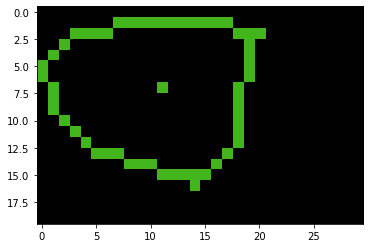

In [555]:
colored_image_2 = np.zeros((height, width, 3), dtype=np.uint8)
ggx,ggy = gg_Arr_mean.tolist()
colored_image_2[ggx,ggy] = color

for x,y in appended_array:
    colored_image_2[x,y] = color
    
for gg_node in gg:
    
    for x,y in graph.nodes[gg_node]['pts']:
        
         colored_image_2[x,y] = color
        

plt.imshow(colored_image_2[0:20,130:160])

In [538]:
width

256

In [586]:
colored_image_2 = np.zeros((height, width, 3), dtype=np.uint8)
ggx,ggy = gg_Arr_mean.tolist()
#colored_image_2[ggx,ggy] = color

boundary_color = (255,255,255)

for x,y in appended_array:
    colored_image_2[x,y] = boundary_color
    
for gg_node in gg:
    
    for x,y in graph.nodes[gg_node]['pts']:
        
         colored_image_2[x,y] = boundary_color

que = deque([])
que.append([ggx,ggy])

while(len(que)!=0):
    #print(que.popleft())
    x,y = que.popleft()
    #print(x,y)
    val = color
    for i,j in dirs:
        k = x+i
        l = y+j
        #print(0<=k<width)
        #print(0<=l<height)
        #print((colored_image_2[k][l]!=color).all())
        #print((colored_image_2[k][l]!=boundary_color).all())
        if((0<=k<width) and (0<=l<height) and ((colored_image_2[k][l]!=color).all()) and ((colored_image_2[k][l]!=boundary_color).all())):
            #print(k,l)
            colored_image_2[k][l] = color
            que.append([k,l])

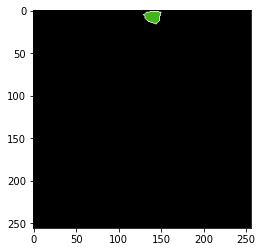

In [587]:
plt.imshow(colored_image_2)

In [517]:
color

(65, 181, 27)

In [520]:
ggx,ggy

(7, 141)

In [521]:
colored_image_2 = np.zeros((height, width, 3), dtype=np.uint16)


ggx,ggy = gg_Arr_mean.tolist()

for x,y in appended_array:
    colored_image_2[x,y] = color
    
gray = cv.cvtColor(colored_image_2,cv.COLOR_BGR2GRAY)

mask = np.zeros((colored_image_2.shape[0]+2,colored_image_2.shape[1]+2),np.uint8)

flood_fill_flags = 4

centroid = (ggx,ggy)

filled_image = colored_image_2.copy()

cv.floodFill(filled_image,None,centroid,color)

error: OpenCV(4.5.3) /tmp/pip-req-build-afu9cjzs/opencv/modules/imgproc/src/floodfill.cpp:540: error: (-210:Unsupported format or combination of formats)  in function 'floodFill'


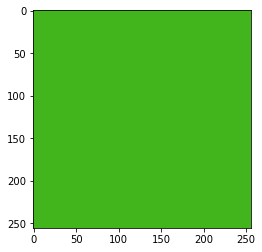

In [505]:
plt.imshow(colored_image_2)

In [565]:
colored_image = np.zeros((height, width, 3), dtype=np.uint8)

for i,cycle in enumerate(cycles):
    
    color = colors[i%len(colors)]
    
    edge_pts = [(cycle[i-1],cycle[i]) for i in range(len(cycle))]
    
    for edge_pt in edge_pts:
        
        for y,x in graph.edges[edge_pt]['pts']:
            
            colored_image[y,x] = color    

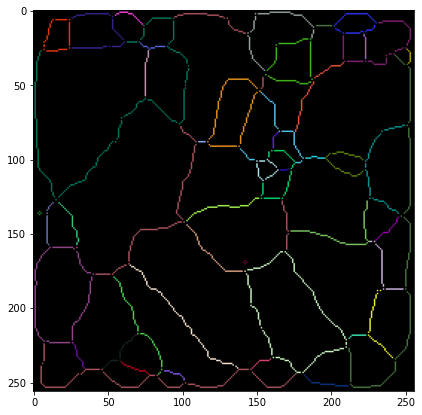

In [566]:
plt.figure(figsize = (7,7))
plt.imshow(colored_image)

In [631]:
masks = []

boundary_color = (255,255,255)

for i,cycle in enumerate(cycles):
    
    colored_image_2 = np.zeros((height, width, 3), dtype=np.uint8)
    
    color = colors[i%len(colors)]
    
    edge_pts = [(cycle[i-1],cycle[i]) for i in range(len(cycle))]
    
    for edge_pt in edge_pts:
        
        for y,x in graph.edges[edge_pt]['pts']:
            
            colored_image_2[y,x] = boundary_color
            
    for gg_node in cycle:
        
        for y,x in graph.nodes[gg_node]['pts']:
            
            colored_image_2[y,x] = boundary_color
            
    #masks.append(colored_image_2)
    
    #break
            
    node_centers = [graph.nodes[i]['o'] for i in cycle]
    
    planar_mean = np.mean(node_centers,axis = 0,dtype = np.uint16)
    
    que = deque([])
    que.append(planar_mean.tolist())

    while(len(que)!=0):
        
        x,y = que.popleft()
        
        val = color
        for i,j in dirs:
            k = x+i
            l = y+j
    
            if((0<=k<width) and (0<=l<height) and ((colored_image_2[k][l]!=color).all()) and ((colored_image_2[k][l]!=boundary_color).all())):
                #print(k,l)
                colored_image_2[k][l] = color
                que.append([k,l])
        
    
    masks.append(colored_image_2)

In [679]:
colored_image_3 = np.zeros((height, width, 3), dtype=np.uint8)

boundary_color = (255,255,255)

for i,cycle in enumerate(cycles):
    
    #colored_image_2 = np.zeros((height, width, 3), dtype=np.uint8)
    
    color = colors[i%len(colors)]
    
    edge_pts = [(cycle[i-1],cycle[i]) for i in range(len(cycle))]
    
    for edge_pt in edge_pts:
        
        for y,x in graph.edges[edge_pt]['pts']:
            
            colored_image_3[y,x] = boundary_color
            
    for gg_node in cycle:
        
        for y,x in graph.nodes[gg_node]['pts']:
            
            colored_image_3[y,x] = boundary_color
            
    #masks.append(colored_image_2)
    
    #break
            
    node_centers = [graph.nodes[i]['o'] for i in cycle]
    
    planar_mean = np.mean(node_centers,axis = 0,dtype = np.uint16)
    
    que = deque([])
    que.append(planar_mean.tolist())

    while(len(que)!=0):
        
        x,y = que.popleft()
        
        val = color
        for i,j in dirs:
            k = x+i
            l = y+j
    
            if((0<=k<width) and (0<=l<height) and ((colored_image_3[k][l]!=color).all()) and ((colored_image_3[k][l]!=boundary_color).all())):
                #print(k,l)
                colored_image_3[k][l] = color
                que.append([k,l])
        
    
    #masks.append(colored_image_2)

In [1]:
plt.imshow(colored_image_3)

NameError: name 'plt' is not defined

In [632]:
len(masks)

48

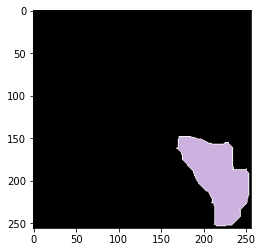

In [637]:
plt.imshow(masks[7])

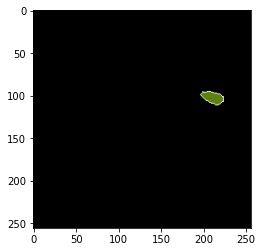

In [676]:
plt.imshow(masks[10])

In [650]:
masks[4].dtype

dtype('uint8')

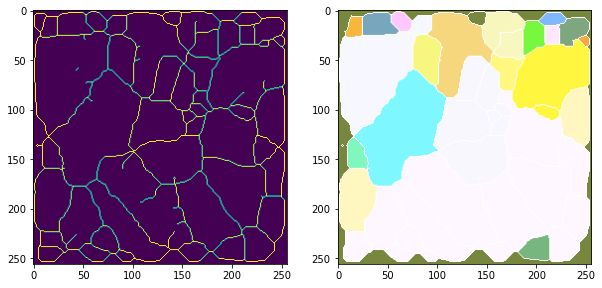

In [678]:
fig,axs = plt.subplots(1,2,figsize = (10,10))
axs[0].imshow(skeleton_int)
combined_mask = np.zeros((height,width,3),dtype = np.uint8)
for mask in masks:
    combined_mask = cv.bitwise_or(combined_mask,mask)
axs[1].imshow(combined_mask)

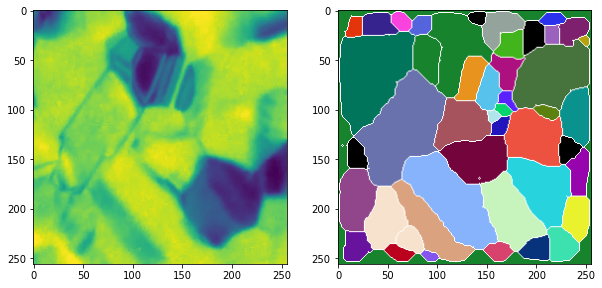

In [683]:
fig,axs = plt.subplots(2,2,figsize = (20,20))
axs[0,0].imshow(img_2[0],cmap = cmap)
axs[0,1].imshow()
axs[0,1].imshow(colored_image_3,cmap = cmap)

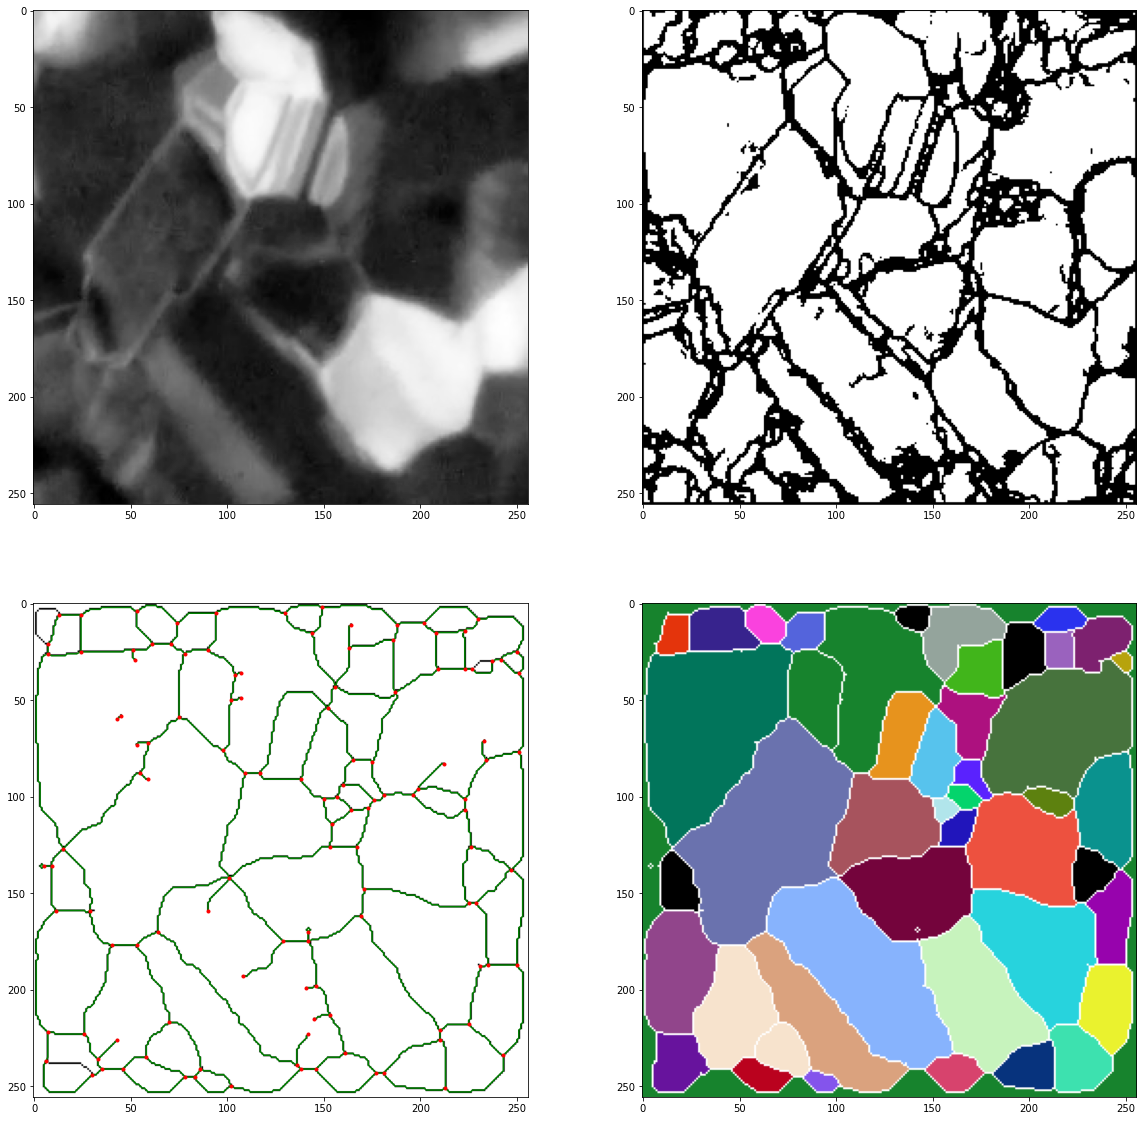

In [684]:
fig,axs = plt.subplots(2,2,figsize = (20,20))
axs[0,0].imshow(img_2[0],cmap = cmap)
axs[0,1].imshow(img,cmap = cmap)
axs[1,0].imshow(skeleton_int,cmap = cmap)
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    axs[1,0].plot(ps[:,1], ps[:,0], 'green')
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
axs[1,0].plot(ps[:,1], ps[:,0], 'r.')
axs[1,1].imshow(colored_image_3)

In [346]:
sknw.neighbors(skeleton.shape)

array([-257, -256, -255,   -1,    1,  255,  256,  257])

In [334]:
cycles = nx.cycle_basis(graph)

In [343]:
skeleton_int = np.array(skeleton,dtype = np.uint8)

In [344]:
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # You can add more colors if needed
colored_image = np.zeros((height, width, 3), dtype=np.uint8)

for i, cycle in enumerate(cycles):
    color = colors[i % len(colors)]

    for node in cycle:
        x, y = node
        colored_image[y, x] = color

colored_image_grey = cv.cvtColor(colored_image,cv.COLOR_BGR2GRAY)
ret, binary_image = cv.threshold(colored_image_grey,1,255,cv.THRESH_BINARY)
result_image = cv.addWeighted(skeleton_int,0.6,binary_image,0.4,0)

TypeError: cannot unpack non-iterable int object

In [340]:
pos = nx.planar_layout(graph)

(-1.0995052483786856,
 1.0896102159523968,
 -0.22918031690847096,
 0.30452965166811524)

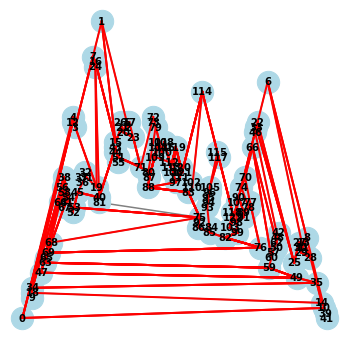

In [341]:
plt.figure(figsize=(6, 6))
for node in graph.nodes:
    plt.scatter(pos[node][0], pos[node][1], color='lightblue', s=500, zorder=2)
for edge in graph.edges:
    plt.plot([pos[edge[0]][0], pos[edge[1]][0]], [pos[edge[0]][1], pos[edge[1]][1]], color='gray', zorder=1)

# Plot cycles
for cycle in cycles:
    path = cycle + [cycle[0]]  # Close the cycle
    cycle_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    for edge in cycle_edges:
        plt.plot([pos[edge[0]][0], pos[edge[1]][0]], [pos[edge[0]][1], pos[edge[1]][1]], color='red', linewidth=2)

# Add labels
for node in graph.nodes:
    plt.text(pos[node][0], pos[node][1], str(node), horizontalalignment='center', verticalalignment='center', fontweight='bold')

# Show the plot
plt.axis('off')

NetworkXError: random_state_index is incorrect

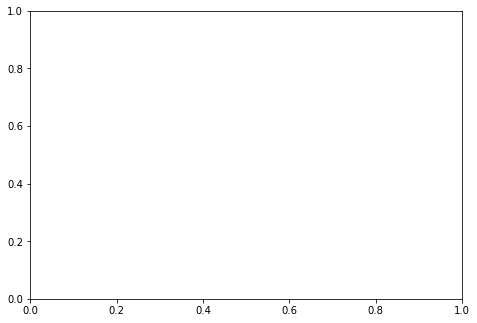

In [331]:
nx.draw(graph,with_labels = False,node_color = 'light_blue',edge_color = 'grey')

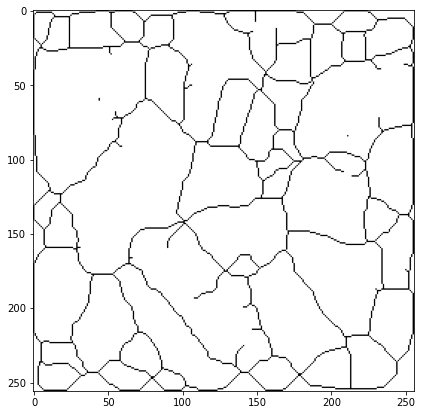

In [326]:

plt.figure(figsize =(7,7))

kernel_dil = np.ones((3,3),np.uint8)
dilation = cv.dilate(img,kernel_dil,iterations=3)

erosion = cv.erode(dilation,kernel_dil,iterations = 3)
skeleton_2 = skeletonize(erosion)
plt.imshow(skeleton_2,cmap = cmap)

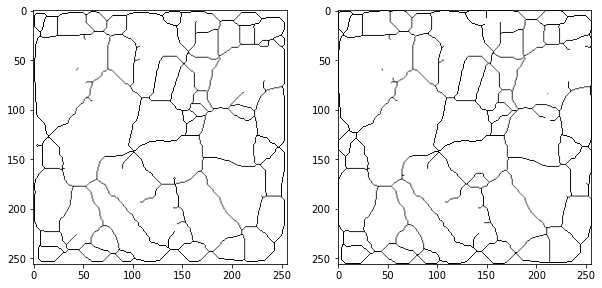

In [328]:
fig,axs = plt.subplots(1,2,figsize = (10,20))
axs[0].imshow(skeleton,cmap = cmap)
axs[1].imshow(skeleton_2,cmap = cmap)

In [136]:
# trying to dilate as much as possible and then skeletonize. That might help

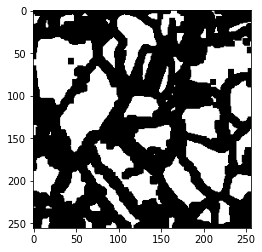

In [144]:
kernel_dil = np.ones((3,3),np.uint8)
dilation = cv.dilate(img,kernel_dil,iterations=3)
plt.imshow(dilation,cmap = cmap)

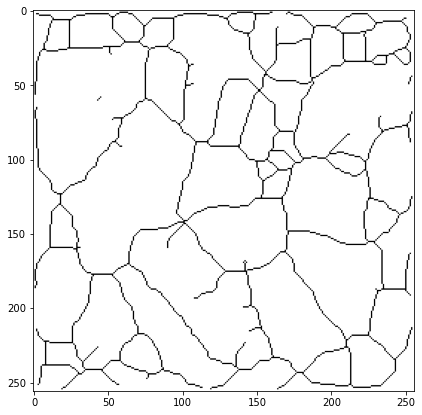

In [162]:
skeleton = skeletonize(dilation)
fig = plt.figure(figsize = (7,7))
plt.imshow(skeleton,cmap = cmap)

In [297]:
import sknw

In [299]:
graph = sknw.build_sknw(skeleton)

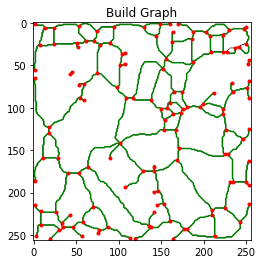

In [304]:
plt.imshow(skeleton,cmap = cmap)
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green')
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
plt.plot(ps[:,1], ps[:,0], 'r.')
plt.title('Build Graph')
plt.show()

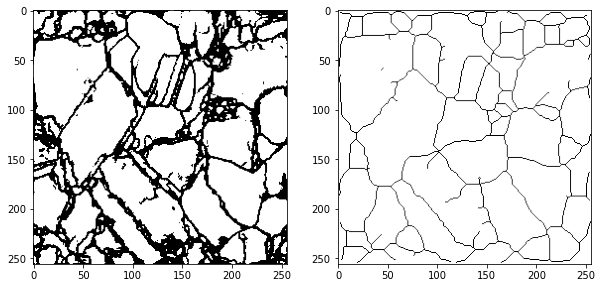

In [151]:
fig,axs = plt.subplots(1,2,figsize = (10,20))
axs[0].imshow(img,cmap = cmap)
axs[1].imshow(skeleton,cmap = cmap)

In [235]:
skeleton_int = np.array(skeleton,np.uint8)

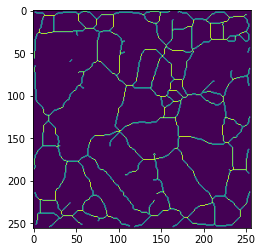

In [286]:
plt.imshow(skeleton_int)

In [281]:
import networkx as nx

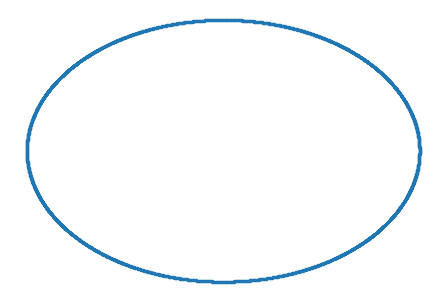

In [296]:
# generating graph and plotting it

graph = nx.Graph()
height, width = skeleton_int.shape

for y in range(height):
    for x in range(width):
        
        if skeleton_int[y,x]:
            
            node = (x,y)
            graph.add_node(node)
            
            neighbours = [
                (x-1,y),
                (x+1,y),
                (x,y-1),
                (x,y+1)
            ]
            
            for neighbour in neighbours:
                nxx,ny = neighbour
                #print("nxx ",nxx," ny ",ny)
                if 0<nxx<width and 0<ny<height and skeleton_int[ny,nxx]:
                    neighbour_node = (nxx,ny)
                    if neighbour_node != node:
                        graph.add_edge(node,neighbour_node)
                    
pos = nx.circular_layout(graph)
nx.draw(graph,pos,with_labels = False,node_size = 5)
plt.show()

In [292]:
skeleton_int[255,164]

0

In [260]:
kernel_dil = np.ones((4,4),np.uint8)
kernel_erode = np.ones((3,3),np.uint8)

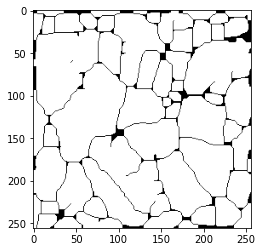

In [261]:
dilate_skeleton = cv.dilate(skeleton_int,kernel_dil,iterations=2)
erode_skeleton = cv.erode(dilate_skeleton,kernel_erode,iterations = 3)
plt.imshow(erode_skeleton,cmap)

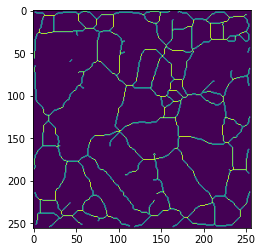

In [270]:
plt.imshow(skeleton)

In [21]:
img[0,:] = np.ones((img_size[1]))
img[img_size[0]-1,:] = np.ones((img_size[1]))
img[:,0] = np.ones((img_size[0]))
img[:,img_size[1]-1] = np.ones((img_size[0]))

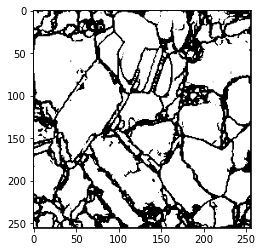

In [22]:
plt.imshow(img,cmap = cmap)

In [26]:
import cv2 as cv

In [33]:
img = img.astype(np.uint8)

In [122]:
kerne_ere = np.ones((2,2),np.uint8)

In [124]:
erosion = cv.erode(img,kerne_ere,iterations = 1)

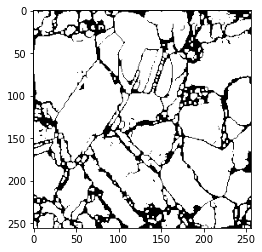

In [125]:
plt.imshow(erosion,cmap = 'Greys')

In [63]:
np.unique(erosion)

array([0, 1], dtype=uint8)

In [64]:
np.unique(img)

array([0, 1], dtype=uint8)

In [76]:
gg_image = img-erosion

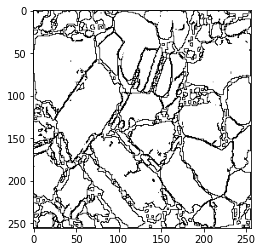

In [79]:
plt.imshow(gg_image,cmap=cmap)

In [29]:
np.max(img)

1

In [30]:
grayscale_array = img*255

In [ ]:
gray_img = cv.cvtColor(grayscale_array,cv.COLOR_GRAYRGB)

In [103]:
dilation = cv.dilate(img,kernel,iterations=1)

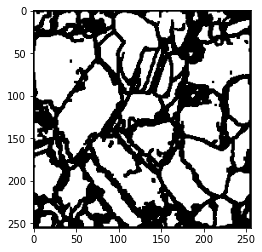

In [104]:
plt.imshow(dilation,cmap = cmap)

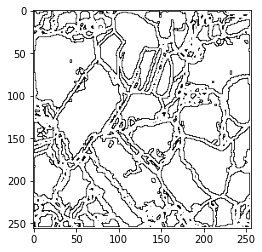

In [107]:
plt.imshow(dilation - img,cmap = cmap)

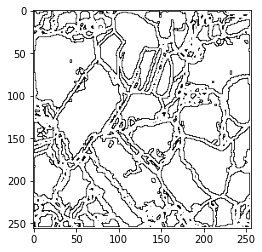

In [105]:
plt.imshow(img-dilation,cmap = cmap)

In [111]:
dilate_erode = cv.erode(dilation,kernel,iterations = 1)

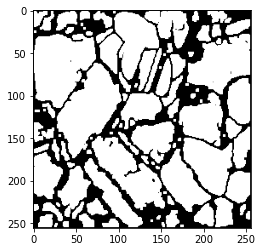

In [113]:
plt.imshow(dilate_erode,cmap = cmap)

In [126]:
from skimage.morphology import skeletonize

In [127]:
skeleton = skeletonize(img)

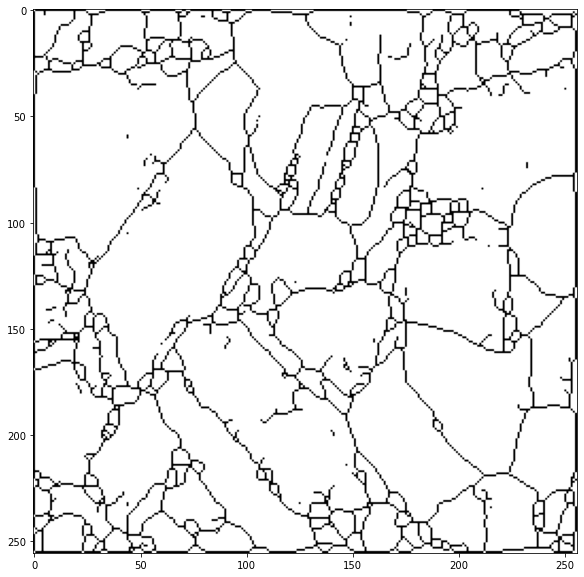

In [130]:
fig = plt.figure(figsize = (10,10))
plt.imshow(skeleton,cmap = cmap)

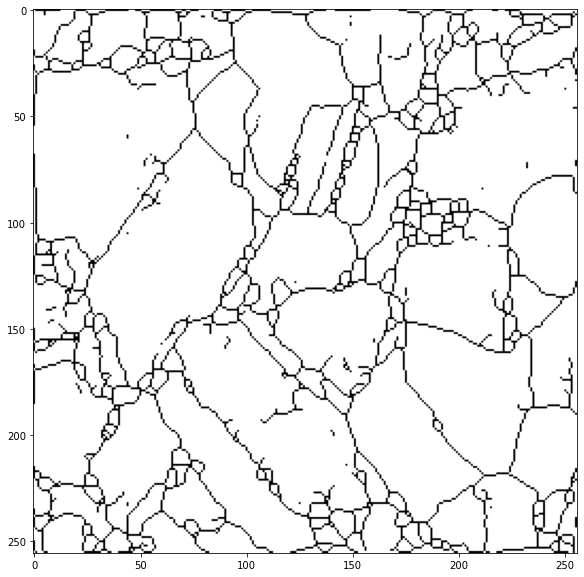

In [134]:
skeleton = skeletonize(img)
fig = plt.figure(figsize = (10,10))
plt.imshow(skeleton,cmap = cmap)

In [685]:
curr_dir

NameError: name 'curr_dir' is not defined

In [686]:
curr_folder = os.getcwd()
mig_file = os.path.join(curr_folder,'crop_image/cropped750.jpg')

In [698]:
img_read = cv.imread(mig_file,0)

In [699]:
img_read.shape

(702, 726)

In [700]:
f = np.fft.fft2(img_read)
fshift = np.fft.fftshift(f)

In [701]:
magnitude_spectrum = 20*np.log(np.abs(fshift))

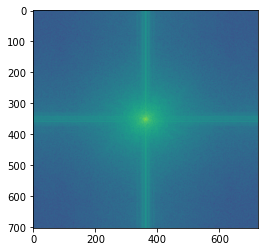

In [703]:
plt.imshow(magnitude_spectrum)